### Read omnibaord data

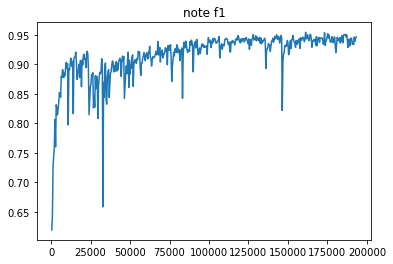

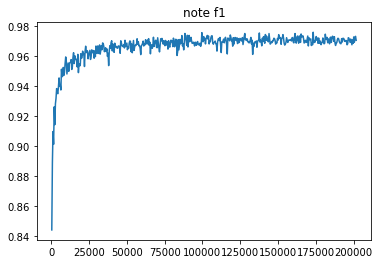

In [37]:
import pandas as pd
import pymongo
import numpy as np
from collections import OrderedDict
import json
import matplotlib.pyplot as plt

from bson import ObjectId
 
myclient = pymongo.MongoClient("mongodb://10.177.55.66:7000/")
mydb = myclient["piano_transcription"]
runs = mydb['runs']

q = {'_id':{'$in':[9,11,]}} #  
res = runs.find(q)
for i in res:
    metrics_info = i['info']['metrics']
    # print(metrics_info)
    for info in metrics_info:
        name = info['name']
        _id = info['id']
        if(name.find('/note/f1') >= 0):
            # print(_id)
            metric = mydb['metrics'].find({'_id': ObjectId(_id)})
            print(metric)
            for item in metric:
                steps = item['steps']
                values = item['values']
                plt.figure()
                plt.title('note f1')
                plt.plot(steps, values)
            

### Read tensorboard data

In [3]:
from tensorboard.backend.event_processing import event_accumulator
import argparse
import pandas as pd
from tqdm import tqdm


def save_tensorboard_log(logdir, out_path):

    # load log data
    # parser = argparse.ArgumentParser(description='Export tensorboard data')
    # parser.add_argument('--in-path', type=str, required=True, help='Tensorboard event files or a single tensorboard '
    #                                                                'file location')
    # parser.add_argument('--ex-path', type=str, required=True, help='location to save the exported data')

    # args = parser.parse_args()
    event_data = event_accumulator.EventAccumulator(logdir)  # a python interface for loading Event data
    event_data.Reload()  # synchronously loads all of the data written so far b
    # print(event_data.Tags())  # print all tags
    keys = event_data.scalars.Keys()  # get all tags,save in a list
    # print(keys)
    df = pd.DataFrame(columns=keys[1:])  # my first column is training loss per iteration, so I abandon it
    for key in tqdm(keys):
        # print(key)
        if key != 'train/total_loss_iter':  # Other attributes' timestamp is epoch.Ignore it for the format of csv file
            df[key] = pd.DataFrame(event_data.Scalars(key)).value

    df.to_csv(out_path)

    print("Tensorboard data exported successfully")


save_tensorboard_log('results/1.proposed', 'results/1.csv')
save_tensorboard_log('results/2.FB-RNN -> RNN', 'results/2.csv')
save_tensorboard_log('results/3.without FB-RNN', 'results/3.csv')
save_tensorboard_log('results/4.without HD-Conv', 'results/4.csv')


In [2]:
import pandas as pd

df = pd.read_csv('results/1.csv')
df.head(10)

,Unnamed: 0,loss/onset,loss/frame,loss/velocity,validation/loss/onset,validation/loss/frame,validation/loss/velocity,validation/metric/onsets/recall,validation/metric/onsets/precision,validation/metric/onsets/f1,...,validation/metric/frame/false_alarm_error,validation/metric/frame/total_error,validation/metric/frame/chroma_precision,validation/metric/frame/chroma_recall,validation/metric/frame/chroma_accuracy,validation/metric/frame/chroma_substitution_error,validation/metric/frame/chroma_miss_error,validation/metric/frame/chroma_false_alarm_error,validation/metric/frame/chroma_total_error,loss
0,0,0.268638,0.308180,0.032076,0.008284,0.074206,0.014436,0.767203,0.953677,0.844923,...,0.036740,0.466820,0.918556,0.581094,0.548863,0.020190,0.398716,0.036740,0.455646,0.608893
1,1,0.080871,0.111466,0.015807,0.006898,0.047356,0.012608,0.840695,0.953578,0.890544,...,0.081822,0.295526,0.886598,0.796719,0.722256,0.026054,0.177226,0.081822,0.285102,0.208144
2,2,0.054908,0.102994,0.015604,0.006269,0.054061,0.010499,0.874992,0.957288,0.911043,...,0.194774,0.319010,0.811408,0.887262,0.733916,0.027195,0.085543,0.194774,0.307512,0.173506
3,3,0.030377,0.087440,0.019488,0.006738,0.052645,0.008525,0.844257,0.979765,0.902957,...,0.063813,0.305504,0.900512,0.766156,0.704894,0.025615,0.208229,0.063813,0.297657,0.137305
4,4,0.032625,0.129058,0.021349,0.005595,0.053290,0.006898,0.894508,0.966756,0.927361,...,0.063825,0.250346,0.911773,0.820888,0.760281,0.019709,0.159403,0.063825,0.242937,0.183032
5,5,0.034170,0.070389,0.015931,0.005577,0.045678,0.006388,0.857272,0.987322,0.914920,...,0.034377,0.297024,0.940210,0.743026,0.708961,0.014596,0.242378,0.034377,0.291351,0.120490
6,6,0.020457,0.045347,0.009283,0.005735,0.040127,0.006549,0.913917,0.948086,0.929455,...,0.060989,0.240433,0.914845,0.826713,0.767438,0.018520,0.154767,0.060989,0.234276,0.075088
7,7,0.022836,0.054996,0.021102,0.005271,0.051838,0.008163,0.891445,0.983334,0.933074,...,0.181010,0.311745,0.835684,0.876578,0.740568,0.018773,0.104649,0.181010,0.304432,0.098934
8,8,0.028980,0.091875,0.020420,0.004887,0.038430,0.006308,0.901611,0.984076,0.939130,...,0.093152,0.219828,0.894560,0.878068,0.794934,0.016201,0.105731,0.093152,0.215084,0.141275
9,9,0.021598,0.069388,0.020257,0.005678,0.035446,0.006486,0.898831,0.983650,0.937283,...,0.070669,0.219707,0.911546,0.856770,0.791627,0.015504,0.127726,0.070669,0.213899,0.111243
